<a href="https://colab.research.google.com/github/BingHung/AI/blob/master/%5B03042019_2%5D_FHI_RT_BH_L1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Preprocess

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
import os
import zipfile

# 將下載到的資料集解壓縮至/tmp
local_zip = '/content/gdrive/My Drive/Keras/RTFILM.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/RTFILM')
zip_ref.close()

In [0]:
import numpy as np
import cv2

ok_img_list=[]
ok_label_list=[]
ng_img_list=[]
ng_label_list=[]
base_path = r'/content/RTFILM'

for root, dirs, files in os.walk(base_path):
    for file in files:
        if file.endswith(".jpg"):
            filename = os.path.join(root, file)
            category_name = os.path.basename(root)  
            imarray = cv2.imread(filename,3)
            imarray = cv2.resize(imarray,(128,128))
            imarray = imarray.astype(np.float32)
            imarray = (imarray - np.min(imarray)) / (np.max(imarray) - np.min(imarray))
            if category_name == 'OK':
              ok_img_list.append(imarray)
              ok_label_list.append(category_name)
            elif category_name == "NG":
              ng_img_list.append(imarray)
              ng_label_list.append(category_name)

In [4]:
print("ok_img_list - length ",len(ok_img_list))
print("ok_label_list - length",len(ok_label_list))
print("ok_img_list - contents ",ok_img_list[0])
print("ok_label_list - contents",ok_label_list[0])

ok_img_list - length  100
ok_label_list - length 100
ok_img_list - contents  [[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 ...

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]]
ok_label_list - contents OK


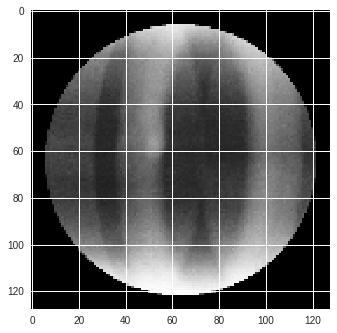

In [5]:
import matplotlib.pyplot as plt
plt.imshow(ok_img_list[0])
plt.show()

In [6]:
import keras

img_arr   = np.concatenate((ok_img_list, ng_img_list), axis = 0)
img_label = np.concatenate((ok_label_list, ng_label_list), axis = 0) 

Using TensorFlow backend.


In [7]:
print(img_arr[0].shape)
print(img_arr[0])

(128, 128, 3)
[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 ...

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]]


In [8]:
print(img_label)
print(type(img_label))

['OK' 'OK' 'OK' 'OK' 'OK' 'OK' 'OK' 'OK' 'OK' 'OK' 'OK' 'OK' 'OK' 'OK'
 'OK' 'OK' 'OK' 'OK' 'OK' 'OK' 'OK' 'OK' 'OK' 'OK' 'OK' 'OK' 'OK' 'OK'
 'OK' 'OK' 'OK' 'OK' 'OK' 'OK' 'OK' 'OK' 'OK' 'OK' 'OK' 'OK' 'OK' 'OK'
 'OK' 'OK' 'OK' 'OK' 'OK' 'OK' 'OK' 'OK' 'OK' 'OK' 'OK' 'OK' 'OK' 'OK'
 'OK' 'OK' 'OK' 'OK' 'OK' 'OK' 'OK' 'OK' 'OK' 'OK' 'OK' 'OK' 'OK' 'OK'
 'OK' 'OK' 'OK' 'OK' 'OK' 'OK' 'OK' 'OK' 'OK' 'OK' 'OK' 'OK' 'OK' 'OK'
 'OK' 'OK' 'OK' 'OK' 'OK' 'OK' 'OK' 'OK' 'OK' 'OK' 'OK' 'OK' 'OK' 'OK'
 'OK' 'OK' 'NG' 'NG' 'NG' 'NG' 'NG' 'NG' 'NG' 'NG' 'NG' 'NG' 'NG' 'NG'
 'NG' 'NG' 'NG' 'NG' 'NG' 'NG' 'NG' 'NG' 'NG' 'NG' 'NG' 'NG' 'NG' 'NG'
 'NG' 'NG' 'NG' 'NG' 'NG' 'NG' 'NG' 'NG' 'NG' 'NG' 'NG' 'NG' 'NG' 'NG'
 'NG' 'NG' 'NG' 'NG' 'NG' 'NG' 'NG' 'NG' 'NG' 'NG' 'NG' 'NG' 'NG' 'NG'
 'NG' 'NG' 'NG' 'NG' 'NG' 'NG' 'NG' 'NG' 'NG' 'NG' 'NG' 'NG' 'NG' 'NG'
 'NG' 'NG' 'NG' 'NG' 'NG' 'NG' 'NG' 'NG' 'NG' 'NG' 'NG' 'NG' 'NG' 'NG'
 'NG' 'NG' 'NG' 'NG' 'NG' 'NG' 'NG' 'NG' 'NG' 'NG' 'NG' 'NG' 'NG' 'NG'
 'NG' 

In [0]:
for i in range(len(img_label)):
  if img_label[i] == 'OK':
    img_label[i] = 1
  elif img_label[i] == 'NG':
    img_label[i] = 0

In [10]:
print(img_label)

['1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1'
 '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1'
 '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1'
 '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1'
 '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1'
 '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0']


In [0]:
img_label = keras.utils.to_categorical(img_label, num_classes = 2)

In [0]:
import random
temp = list(zip(img_arr, img_label))
random.shuffle(temp)
img_arr, img_label = zip(*temp)
img_arr=np.asarray(img_arr)
img_label=np.asarray(img_label)

In [13]:
print(img_label)
print(temp[0])

[[0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 

In [0]:
from sklearn.model_selection import train_test_split
train_data, test_data, train_label, test_label = train_test_split(img_arr, img_label, test_size=0.2, random_state=42)

In [15]:
print('train_data',train_data.shape)
print('train_label',train_label.shape)
print('test_data',test_data.shape)
print('test_label',test_label.shape)

train_data (160, 128, 128, 3)
train_label (160, 2)
test_data (40, 128, 128, 3)
test_label (40, 2)


## Model Construction

In [16]:
#%% Create Model
from keras.models import Sequential
from keras.layers import Dense, SpatialDropout2D, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD,RMSprop
from keras.callbacks import EarlyStopping

# Generate model
model = Sequential()

model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(128,128,3),padding='same',name='block1_conv2_1'))
model.add(Conv2D(64, (3, 3), activation='relu',padding='same',name='block1_conv2_2'))
model.add(MaxPooling2D(pool_size=(2, 2),name='block1_MaxPooling'))
model.add(SpatialDropout2D(0.25))

model.add(Conv2D(128, (3, 3), activation='relu',padding='same',name='block2_conv2_1'))
model.add(Conv2D(128, (3, 3), activation='relu',padding='same',name='block2_conv2_2'))
model.add(MaxPooling2D(pool_size=(2, 2),name='block2_MaxPooling'))
model.add(SpatialDropout2D(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu',name='final_output_1'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu',name='final_output_2'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='sigmoid',name='class_output'))
optimizer = RMSprop(lr=1e-4)
objective = 'binary_crossentropy'
model.compile(loss=objective, optimizer=optimizer, metrics=['accuracy'])
EStop = EarlyStopping(monitor='val_acc', min_delta=0, 
                      patience=10, verbose=1, mode='auto')


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


## Training

In [17]:
#Training and saving
history = model.fit(train_data, train_label, batch_size=64, epochs=100,shuffle=True, validation_split=0.2,callbacks=[EStop])

import time
timestr = time.strftime("%Y%m%d_%H%M%S")
model.save('FHITR_model_{}.h5'.format(timestr)) 

Instructions for updating:
Use tf.cast instead.
Train on 128 samples, validate on 32 samples
Epoch 1/100
128/128 [==============================] - 6s 47ms/step - loss: 0.6949 - acc: 0.5938 - val_loss: 0.5617 - val_acc: 0.6562
Epoch 2/100
128/128 [==============================] - 1s 5ms/step - loss: 0.7073 - acc: 0.5742 - val_loss: 0.5397 - val_acc: 0.5000
Epoch 3/100
128/128 [==============================] - 1s 5ms/step - loss: 0.5429 - acc: 0.7500 - val_loss: 0.3433 - val_acc: 1.0000
Epoch 4/100
128/128 [==============================] - 1s 5ms/step - loss: 0.4002 - acc: 0.8789 - val_loss: 0.1888 - val_acc: 1.0000
Epoch 5/100
128/128 [==============================] - 1s 5ms/step - loss: 0.2830 - acc: 0.9258 - val_loss: 0.1039 - val_acc: 1.0000
Epoch 6/100
128/128 [==============================] - 1s 5ms/step - loss: 0.2208 - acc: 0.9453 - val_loss: 0.0599 - val_acc: 1.0000
Epoch 7/100
128/128 [==============================] - 1s 5ms/step - loss: 0.1919 - acc: 0.9570 - val_loss: 

## Visulaize

In [0]:
# Model Structure
from keras.utils import plot_model
plot_model(model, to_file='model_{}.png'.format(timestr),show_shapes=True, show_layer_names=True)

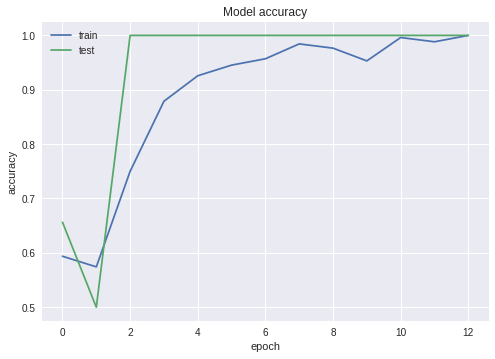

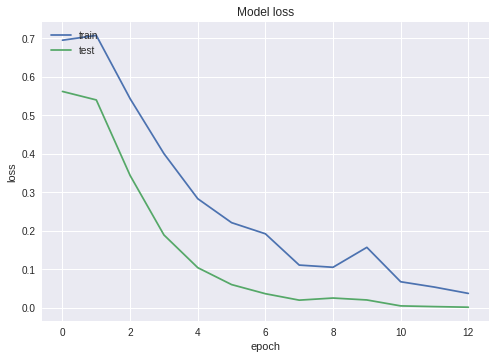

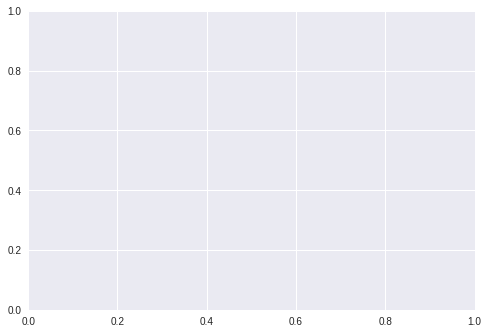

In [19]:
# Training History
import collections
import pandas as pd
hist = history.history

for key, val in hist.items(): # Count the number of epoch
    numepo = len(np.asarray(val))
    break
hist = collections.OrderedDict(hist)
pd.DataFrame(hist).to_excel('model_{}_history.xlsx'.format(timestr), index=True)

import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.savefig('Model accuracy_{}.png'.format(timestr))
plt.cla()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.savefig('Model loss_{}.png'.format(timestr))
plt.cla()

In [21]:
#%% Confusion Matrix
import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes_x,classes_y,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    plt.clf()
    plt.cla()
    plt.style.use('default')
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.grid(False)
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks_x = np.arange(len(classes_x))
    tick_marks_y = np.arange(len(classes_y))
    plt.xticks(tick_marks_x, classes_x, rotation=45)
    plt.yticks(tick_marks_y, classes_y)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.savefig(title+'.png',dpi=350 ,bbox_inches='tight')
    plt.close()

test_pred  = model.predict(test_data)
cnf_matrix = confusion_matrix(np.argmax(test_label, axis=1).reshape(-1,1),
                              np.argmax(test_pred, axis=1).reshape(-1,1))
np.set_printoptions(precision=2)
plot_confusion_matrix(cnf_matrix,['OK','NG'],['OK','NG'],normalize=True,title='Confusion Matrix Nor')


Normalized confusion matrix
[[1. 0.]
 [0. 1.]]
